# SPATIAL DATA: Homework 3
## Sergio-Yersi Villegas Pelegrín
### *February 2022*
#### **Studying the urban nature and children’s recreation areas around primary schools in Barcelona**

# MODULES



We load all the modules that will be used throughout the homework. Geopandas and Rasterio are the essential ones when working with spatial data.

In [1]:
import geopandas
import pandas as pd
import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import rioxarray as rxr
from rasterio import plot as rioplot
from difflib import SequenceMatcher
from sklearn.preprocessing import MaxAbsScaler, RobustScaler
from sklearn_pandas import DataFrameMapper

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

# VECTOR DATA: constructing GeoDataFrames

## BARCELONA

We load the data regarding the administrative units of Barcelona.

In [2]:
#bcn = geopandas.read_file('/Users/yersivillegas/Downloads/shapefile_distrito_barcelona.geojson')
bcn = geopandas.read_file('/Users/yersivillegas/Desktop/TERM 2/SD/HW2/Villegas_HW2/0301100100_UNITATS_ADM_POLIGONS.json')
bcn.head()

,FID,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,NIVELL,NDESCR_CA,NDESCR_ES,NDESCR_EN,TERME,DISTRICTE,BARRI,AEB,SEC_CENS,GRANBARRI,ZUA,AREA_I,LITERAL,PERIMETRE,AREA,CODI_UA,TIPUS_UA,NOM,WEB1,WEB2,WEB3,FHEX_COLOR,Shape_Leng,Shape_Area,geometry
0,0,01,Grup - I,0104,Unitats Administratives,010411,Terme Municipal,01041101,Terme Municipal,0104110101,Límit de terme municipal,ADM_01_PL,Límit de terme municipal (polígon),Límite de término municipal (polígono),Municipality boundary (polygon),080193,-,-,-,-,-,-,-,080193,114036.625,1.017050e+08,080193,TERME,Barcelona,http://www.bcn.cat,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/document...,#000000,114036.624503,1.017050e+08,"MULTIPOLYGON (((432115.848 4590999.098, 432010..."
1,1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,ADM_02_PL,Límit de districte (polígon),Límite de distrito (polígono),District boundary (polygon),080193,01,-,-,-,-,-,-,01,21366.962,4.204931e+06,01,DISTRICTE,Ciutat Vella,http://www.bcn.cat/ciutatvella,http://www.bcn.cat/estadistica/catala/dades/gu...,http://www.bcn.cat/estadistica/catala/document...,#000000,21366.961806,4.204931e+06,"POLYGON ((431733.736 4582441.816, 431645.093 4..."
2,2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,ADM_02_PL,Límit de districte (polígon),Límite de distrito (polígono),District boundary (polygon),080193,02,-,-,-,-,-,-,02,13931.644,7.464303e+06,02,DISTRICTE,Eixample,http://www.bcn.cat/eixample,http://www.bcn.cat/estadistica/catala/dades/gu...,http://www.bcn.cat/estadistica/catala/document...,#000000,13931.644175,7.464303e+06,"POLYGON ((432033.184 4583665.032, 432033.186 4..."
3,3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,ADM_02_PL,Límit de districte (polígon),Límite de distrito (polígono),District boundary (polygon),080193,03,-,-,-,-,-,-,03,46711.857,2.287985e+07,03,DISTRICTE,Sants-Montjuïc,http://www.bcn.cat/sants-montjuic,http://www.bcn.cat/estadistica/catala/dades/gu...,http://www.bcn.cat/estadistica/catala/document...,#000000,46711.856798,2.287985e+07,"MULTIPOLYGON (((428773.911 4580873.742, 428692..."
4,4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,ADM_02_PL,Límit de districte (polígon),Límite de distrito (polígono),District boundary (polygon),080193,04,-,-,-,-,-,-,04,12551.602,6.010769e+06,04,DISTRICTE,Les Corts,http://www.bcn.cat/lescorts,http://www.bcn.cat/estadistica/catala/dades/gu...,http://www.bcn.cat/estadistica/catala/document...,#000000,12551.602001,6.010769e+06,"POLYGON ((425054.670 4583672.560, 425047.220 4..."


In [3]:
distritos_code = list(bcn['DISTRICTE'].unique())
distritos_code = distritos_code[1:]
distritos_name = list(bcn[bcn['TIPUS_UA']=='DISTRICTE']['NOM'].unique())
distritos_df = pd.DataFrame(distritos_name,distritos_code)
bcn['DISTRICTE'] = bcn['DISTRICTE'].replace(to_replace=distritos_df.index, value=distritos_df.values)

In [4]:
bcn[bcn['TIPUS_UA']=='DISTRICTE'][['DISTRICTE', 'NOM']]

,DISTRICTE,NOM
1,Ciutat Vella,Ciutat Vella
2,Eixample,Eixample
3,Sants-Montjuïc,Sants-Montjuïc
4,Les Corts,Les Corts
5,Sarrià-Sant Gervasi,Sarrià-Sant Gervasi
6,Gràcia,Gràcia
7,Horta-Guinardó,Horta-Guinardó
8,Nou Barris,Nou Barris
9,Sant Andreu,Sant Andreu
10,Sant Martí,Sant Martí


We check the columns and the unique values of the different type of data polygons we have.

In [5]:
bcn.columns

Index(['FID', 'ID_ANNEX', 'ANNEXDESCR', 'ID_TEMA', 'TEMA_DESCR', 'ID_CONJUNT',
       'CONJ_DESCR', 'ID_SUBCONJ', 'SCONJ_DESC', 'ID_ELEMENT', 'ELEM_DESCR',
       'NIVELL', 'NDESCR_CA', 'NDESCR_ES', 'NDESCR_EN', 'TERME', 'DISTRICTE',
       'BARRI', 'AEB', 'SEC_CENS', 'GRANBARRI', 'ZUA', 'AREA_I', 'LITERAL',
       'PERIMETRE', 'AREA', 'CODI_UA', 'TIPUS_UA', 'NOM', 'WEB1', 'WEB2',
       'WEB3', 'FHEX_COLOR', 'Shape_Leng', 'Shape_Area', 'geometry'],
      dtype='object')

In [6]:
bcn['TIPUS_UA'].unique()

array(['TERME', 'DISTRICTE', 'BARRI', 'AEB', 'SEC_CENS', 'AREA_I',
       'GRANBARRI', 'ZUA'], dtype=object)

We create two smaller GeoDataFrames only with the rows that correspond to data regarding: first, the districts of Barcelona and, secondly, the sub-divisions within each district. This has been done in order to be able to plot the map in the most convenient way (with the districts colored and the sub-divisions highlighted.

In [7]:
bcn_barrios = bcn[bcn['TIPUS_UA']=='DISTRICTE']
bcn_smaller = bcn[bcn['TIPUS_UA']=='BARRI']
bcn_barrios['NOM'].unique()
#bcn_barrios['color'] = bcn_barrios['NOM'].replace(to_replace=list(bcn_barrios['NOM']),value=fourty_colors)

array(['Ciutat Vella', 'Eixample', 'Sants-Montjuïc', 'Les Corts',
       'Sarrià-Sant Gervasi', 'Gràcia', 'Horta-Guinardó', 'Nou Barris',
       'Sant Andreu', 'Sant Martí'], dtype=object)

We check the coordinates of the GeoDataFrame.

In [8]:
bcn_barrios.crs

<Derived Projected CRS: EPSG:25831>
Name: ETRS89 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 0°E and 6°E: Andorra; Belgium - onshore and offshore; Denmark - offshore; Germany - offshore; Jan Mayen - offshore; Norway including Svalbard - onshore and offshore; Spain - onshore and offshore.
- bounds: (0.0, 37.0, 6.01, 82.45)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

We plot the administrative units of Barcelona as previously stated.

<AxesSubplot:title={'center':'The 10 districts of Barcelona, each one with its sub-divisions'}>

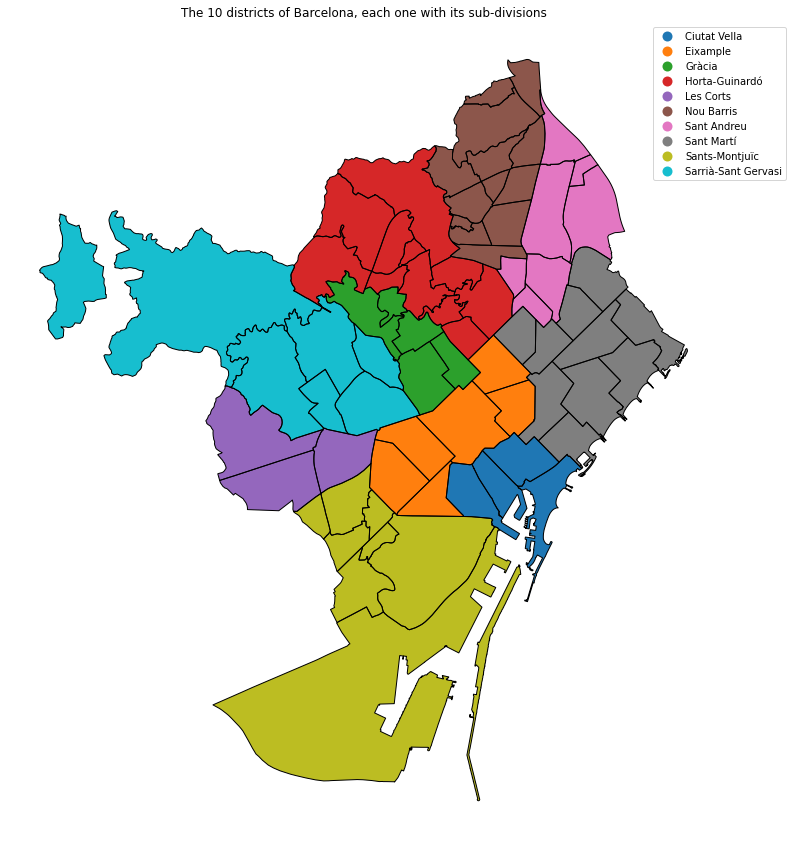

In [9]:
ax = bcn_barrios.plot(figsize = (15,15),legend=True,
                      legend_kwds={'bbox_to_anchor': (1.1, 1)},
                      column='NOM')
bcn_smaller.plot(ax=ax, facecolor='#FF000000', edgecolor = 'black')
ax.set(title="The 10 districts of Barcelona, each one with its sub-divisions")
ax.set_axis_off()
ax

In [10]:
ciutat_vella = bcn_barrios.loc[bcn_barrios['NOM'] == 'Ciutat Vella', 'geometry'].squeeze()
eixample = bcn_barrios.loc[bcn_barrios['NOM'] == 'Eixample', 'geometry'].squeeze()
sants_montjuic = bcn_barrios.loc[bcn_barrios['NOM'] == 'Sants-Montjuïc', 'geometry'].squeeze()
les_corts = bcn_barrios.loc[bcn_barrios['NOM'] == 'Les Corts', 'geometry'].squeeze()
sarria_santgervasi = bcn_barrios.loc[bcn_barrios['NOM'] == 'Sarrià-Sant Gervasi', 'geometry'].squeeze()
gracia = bcn_barrios.loc[bcn_barrios['NOM'] == 'Gràcia', 'geometry'].squeeze()
horta_guinardo = bcn_barrios.loc[bcn_barrios['NOM'] == 'Horta-Guinardó', 'geometry'].squeeze()
nou_barris = bcn_barrios.loc[bcn_barrios['NOM'] == 'Nou Barris', 'geometry'].squeeze()
sant_andreu = bcn_barrios.loc[bcn_barrios['NOM'] == 'Sant Andreu', 'geometry'].squeeze()
sant_marti = bcn_barrios.loc[bcn_barrios['NOM'] == 'Sant Martí', 'geometry'].squeeze()

## SCHOOLS IN BARCELONA

We load the data regarding the schools of Barcelona.

In [11]:
escuelas = pd.read_json('/Users/yersivillegas/Desktop/TERM 2/SD/HW2/Villegas_HW2/opendatabcn_educacio_ensenyament_reglat-js.json')
escuelas.columns

Index(['register_id', 'prefix', 'suffix', 'name', 'created', 'modified',
       'status', 'status_name', 'core_type', 'core_type_name', 'body',
       'tickets_data', 'addresses', 'entity_types_data',
       'attribute_categories', 'values', 'from_relationships',
       'to_relationships', 'classifications_data', 'secondary_filters_data',
       'timetable', 'image_data', 'gallery_data', 'warnings', 'geo_epgs_25831',
       'geo_epgs_23031', 'geo_epgs_4326', 'is_section_of_data',
       'sections_data', 'start_date', 'end_date', 'estimated_dates',
       'languages_data', 'type', 'type_name', 'period', 'period_name',
       'event_status_name', 'event_status', 'ical'],
      dtype='object')

In order to have the data as GeoDataFrames, we will be creating the corresponding 'geometry' column (which uniquely differentiates a GeoDataFrame from a regular DataFrame), since the data contains the coordinates (in the three different systems of reference) as dictionaries. In order to do that, we apply our custom function, which returns a list with the values of a given dictionary, to each row. Then, once we have the coordinates in a list, we apply the 'Point()' function from the 'shapely.geometry' package, which creates a geographical 'point' object to identify the values in a map. Finally, with this new column, we can already transform it to a GeoDataFrame with the right coordinates.

In [12]:
from shapely.geometry import Point
def make_list(diction):
  return list(diction.values())

In [13]:
escuelas_loc = escuelas[escuelas['geo_epgs_25831'].isnull()==False]
escuelas_loc['coor_list'] = escuelas_loc['geo_epgs_25831'].apply(make_list)
escuelas_loc['geometry'] = escuelas_loc.apply(lambda x: Point(x['coor_list'][0], x['coor_list'][1]), axis = 1)
gdf_schools = geopandas.GeoDataFrame(escuelas_loc, crs='epsg:25831')

<ipython-input-13-939d5815c394>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  escuelas_loc['coor_list'] = escuelas_loc['geo_epgs_25831'].apply(make_list)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:112: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  values = construct_1d_object_array_from_listlike(values)
<ipython-input-13-939d5815c394>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [14]:
gdf_schools[['name', 'geo_epgs_25831', 'coor_list', 'geometry']].head()

,name,geo_epgs_25831,coor_list,geometry
0,Escola de Música de Barcelona,"{'x': 430491.63833869237, 'y': 4583294.63805769}","[430491.63833869237, 4583294.63805769]",POINT (430491.638 4583294.638)
1,Centre de Formació Professional Cruïlla,"{'x': 431564.31574354996, 'y': 4590101.292519781}","[431564.31574354996, 4590101.292519781]",POINT (431564.316 4590101.293)
2,Escola de Música,"{'x': 429489.3289236514, 'y': 4584031.287665447}","[429489.3289236514, 4584031.287665447]",POINT (429489.329 4584031.288)
3,Institut Montjuïc,"{'x': 428499.8866960568, 'y': 4578571.699744943}","[428499.8866960568, 4578571.699744943]",POINT (428499.887 4578571.700)
4,Rectorat,"{'x': 426216.309085875, 'y': 4582360.912260973}","[426216.309085875, 4582360.912260973]",POINT (426216.309 4582360.912)


We check that the coordinates of both GeoDataFrames are the same.

In [15]:
#gdf = gdf.to_crs(25831)
gdf_schools.crs==bcn.crs

True

We plot the schools of Barcelona within the previously explained administrative units of the city.

In [16]:
#marker_patch = mpatches.Patch(color='black', label='schools')
#ax.legend(handles=[marker_patch])

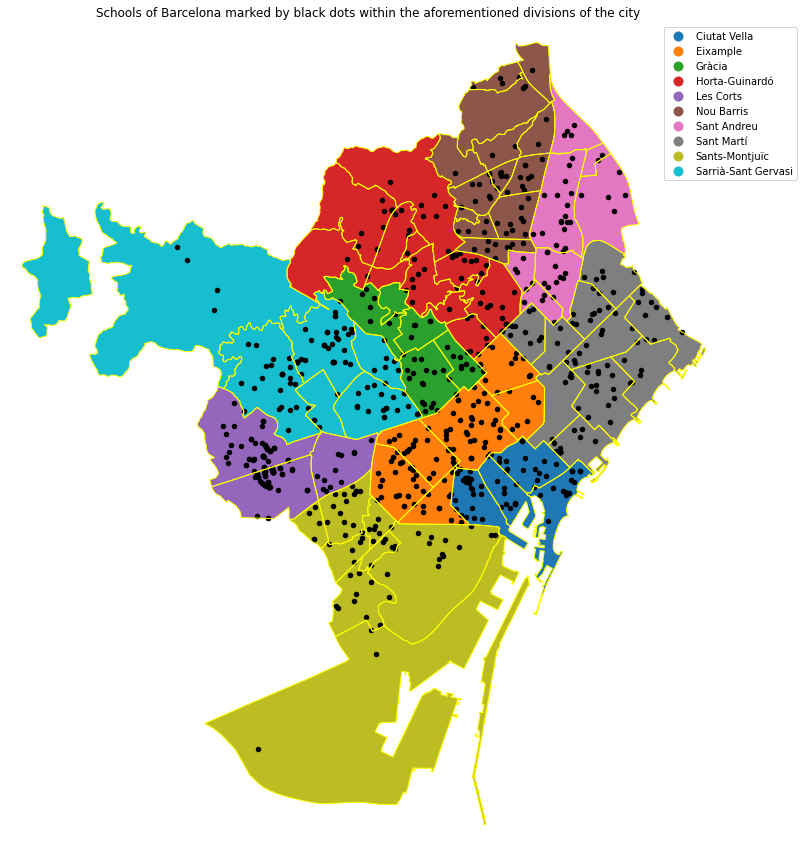

In [17]:
ax = bcn_barrios.plot(figsize = (15,15),legend=True,
                      legend_kwds={'bbox_to_anchor': (1.1, 1)},
                      column='NOM')
gdf_schools.plot(ax=ax, markersize = 20.0, color = 'black')
bcn_smaller.plot(ax=ax, facecolor='#FF000000', edgecolor = 'yellow')
ax.set(title="Schools of Barcelona marked by black dots within the aforementioned divisions of the city")
ax.set_xlim(420500, 436000)
ax.set_ylim(4574000, 4591500)
ax.set_axis_off()

## CHILDREN'S RECREATION AREAS IN BARCELONA

We load the data regarding the schools of Barcelona.

In [18]:
juego = pd.read_json('/Users/yersivillegas/Desktop/TERM 2/SD/HW2/Villegas_HW2/opendatabcn_cultura_espais-infantils-js.json')
juego.columns

Index(['register_id', 'prefix', 'suffix', 'name', 'created', 'modified',
       'status', 'status_name', 'core_type', 'core_type_name', 'body',
       'tickets_data', 'addresses', 'entity_types_data',
       'attribute_categories', 'values', 'from_relationships',
       'to_relationships', 'classifications_data', 'secondary_filters_data',
       'timetable', 'image_data', 'gallery_data', 'warnings', 'geo_epgs_25831',
       'geo_epgs_23031', 'geo_epgs_4326', 'is_section_of_data',
       'sections_data', 'start_date', 'end_date', 'estimated_dates',
       'languages_data', 'type', 'type_name', 'period', 'period_name',
       'event_status_name', 'event_status', 'ical'],
      dtype='object')

Again, we do the same steps we did before in order to have the data as a GeoDataFrame.

In [19]:
juego_loc = juego[juego['geo_epgs_25831'].isnull()==False]
juego_loc['coor_list'] = juego_loc['geo_epgs_25831'].apply(make_list)
juego_loc['geometry'] = juego_loc.apply(lambda x: Point(x['coor_list'][0], x['coor_list'][1]), axis = 1)
gdf_playareas = geopandas.GeoDataFrame(juego_loc, crs='epsg:25831')

<ipython-input-19-def54c2eb6a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  juego_loc['coor_list'] = juego_loc['geo_epgs_25831'].apply(make_list)
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:112: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  values = construct_1d_object_array_from_listlike(values)
<ipython-input-19-def54c2eb6a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [20]:
gdf_playareas[['name', 'geo_epgs_25831', 'coor_list', 'geometry']].head()

,name,geo_epgs_25831,coor_list,geometry
0,Àrea de Joc Infantil a València - Espronceda -...,"{'x': 432421.69923842786, 'y': 4585018.029642559}","[432421.69923842786, 4585018.029642559]",POINT (432421.699 4585018.030)
1,Àrea de Joc Infantil a l'Avinguda Sarrià - Agu...,"{'x': 427707.37454214145, 'y': 4582599.812252195}","[427707.37454214145, 4582599.812252195]",POINT (427707.375 4582599.812)
2,Àrea de Joc Infantil a la Plaça de Can Rosés,"{'x': 427702.9006752941, 'y': 4582182.470323251}","[427702.9006752941, 4582182.470323251]",POINT (427702.901 4582182.470)
3,Àrea de Joc Infantil a la Plaça Falset,"{'x': 428229.5723980615, 'y': 4578236.131965784}","[428229.5723980615, 4578236.131965784]",POINT (428229.572 4578236.132)
4,Àrea de Joc Infantil a la Plaça Sagrada Família,"{'x': 430857.5626973769, 'y': 4583711.630065452}","[430857.5626973769, 4583711.630065452]",POINT (430857.563 4583711.630)


We plot the schools of Barcelona (black markers) and the children's play areas (white markers) within the previously explained administrative units of the city.

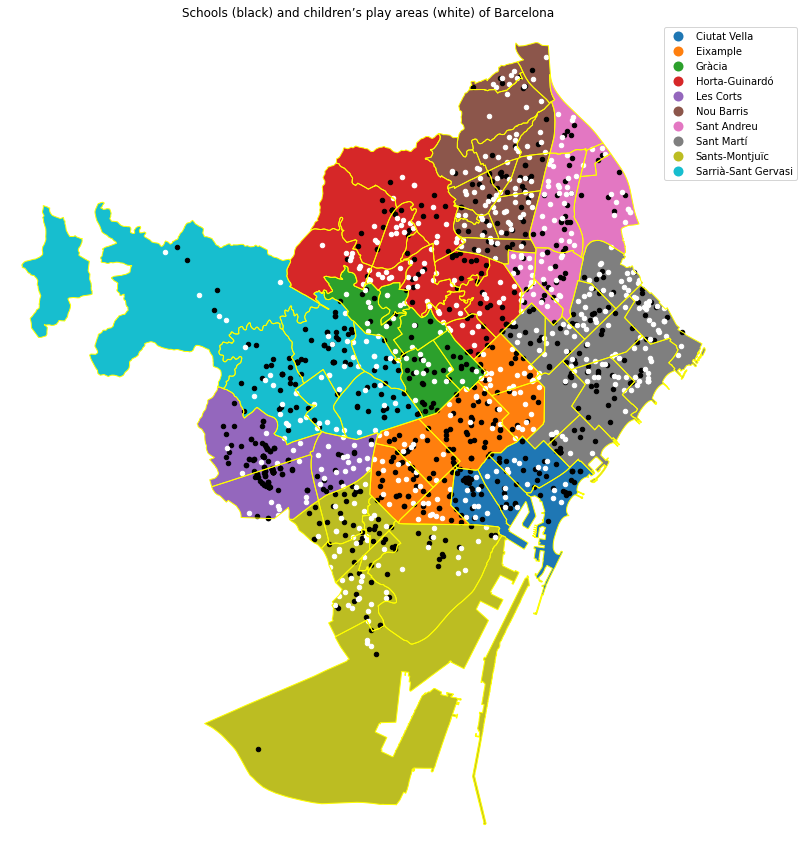

In [21]:
ax = bcn_barrios.plot(figsize = (15,15),legend=True,
                      legend_kwds={'bbox_to_anchor': (1.1, 1)},
                      column='NOM')
gdf_schools.plot(ax=ax, markersize = 20.0, color = 'black')
gdf_playareas.plot(ax=ax, markersize = 20.0, color = 'white')
bcn_smaller.plot(ax=ax, facecolor='#FF000000', edgecolor = 'yellow')
ax.set(title="Schools (black) and children’s play areas (white) of Barcelona")
ax.set_xlim(420500, 436000)
ax.set_ylim(4574000, 4591500)
ax.set_axis_off()

# RASTER DATA: overlay

We load the data regarding the vegetable cover of the city of Barcelona, based on the Normalized Vegetation Difference  Index (NVDI), seen from the sky. Then, we plot the raster.

In [22]:
green = rxr.open_rasterio('/Users/yersivillegas/Desktop/TERM 2/SD/HW2/Villegas_HW2/2017_ndvi.tif', masked=True).squeeze()
type(green)

xarray.core.dataarray.DataArray

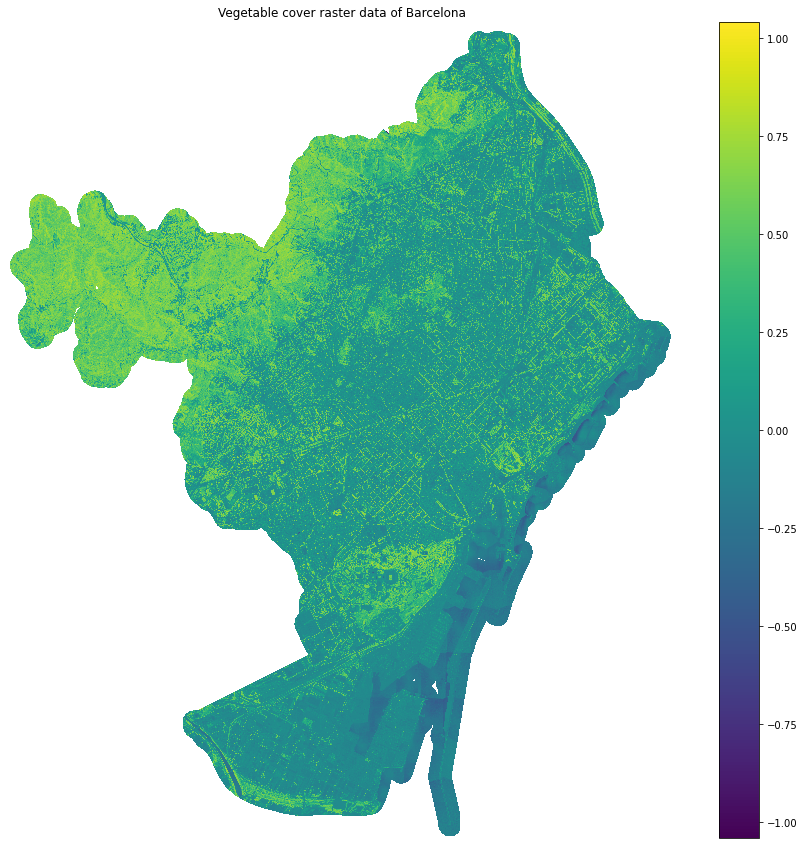

In [23]:
f, ax = plt.subplots(figsize=(15, 15))
green.plot.imshow(cmap = 'viridis') 
#gdf.plot(ax=ax, markersize = 10.0, color = 'black')
ax.set(title="Vegetable cover raster data of Barcelona")
ax.set_xlim(420500, 436000)
ax.set_ylim(4574000, 4591500)
ax.set_axis_off() 
plt.show()


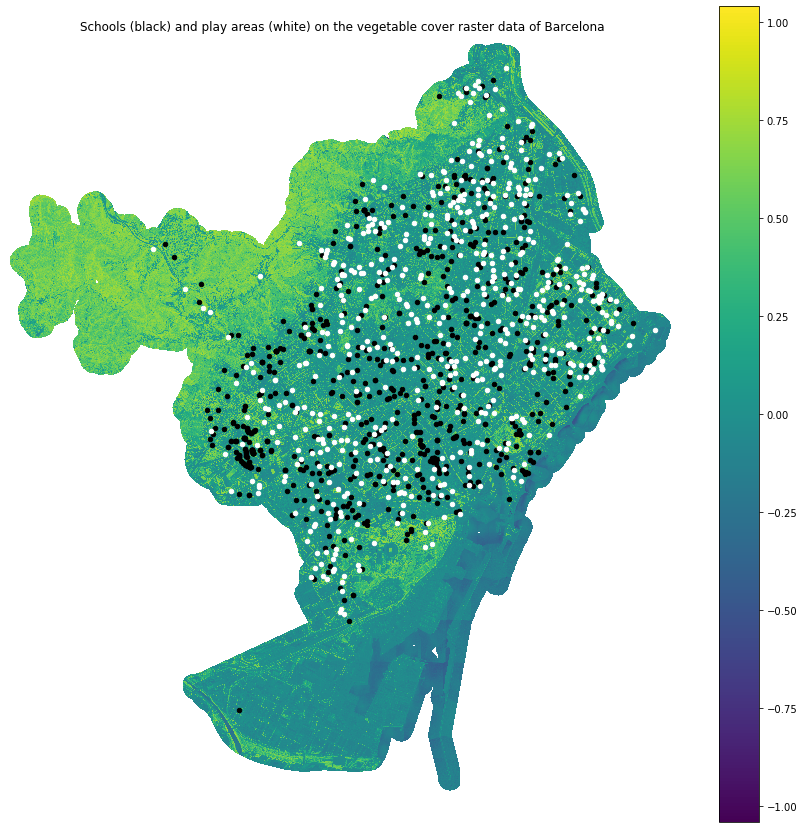

In [24]:
f, ax = plt.subplots(figsize=(15, 15))
green.plot.imshow(cmap = 'viridis') 
gdf_schools.plot(ax=ax, markersize = 20.0, color = 'black')
gdf_playareas.plot(ax=ax, markersize = 20.0, color = 'white')
ax.set(title="Schools (black) and play areas (white) on the vegetable cover raster data of Barcelona")
ax.set_xlim(420500, 436000)
ax.set_ylim(4574000, 4591500)
ax.set_axis_off() 
plt.show()

Trying some commands with raster data.

In [25]:
bcnrast = rasterio.open("/Users/yersivillegas/Desktop/TERM 2/SD/HW2/Villegas_HW2/2017_ndvi.tif")

In [26]:
bcnrast.transform

Affine(0.9000000000000012, 0.0, 419356.8,
       0.0, -0.9000000000000261, 4592311.2)

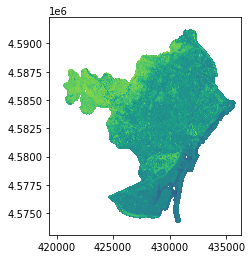

<AxesSubplot:>

In [27]:
from rasterio.plot import show
show(bcnrast)

In [28]:
a = bcnrast.read(masked=True)
a

masked_array(
  data=[[[--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         ...,
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --],
         [--, --, --, ..., --, --, --]]],
  mask=[[[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]]],
  fill_value=-3.4028235e+38,
  dtype=float32)

In [29]:
mask = bcnrast.read_masks()

In [30]:
mask

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [31]:
a.max()

1.04

After having gained familiarity with some rasterio commands, we will be computing the zonal statistics of our raster data in order to be able to join the information with the vector data above.

In [32]:
from rasterstats import zonal_stats

In [33]:
dem_data = bcnrast.read(1)
transf = bcnrast.transform
nodata = bcnrast.meta['nodata']

In [34]:
bcnrast.shape

(21364, 18811)

We use all the functions offered by the 'zonal statistics' function to have all the possibilities at our reach.

In [35]:
result = zonal_stats(bcn_smaller, dem_data, nodata = nodata, affine = transf, 
                     stats = ['min', 'max','mean', 'count','sum','std','median','majority','minority','unique','range','nodata'])

In [36]:
result = pd.DataFrame(result)
result.head()

,min,max,mean,count,sum,std,median,majority,minority,unique,range,nodata
0,-0.71,0.79,0.058144,1358389,78982.101562,0.171704,0.01,0.03,-0.69,148,1.50,0.0
1,-0.69,0.75,0.027492,1006917,27681.767578,0.143912,0.00,0.00,-0.69,143,1.44,0.0
2,-0.72,0.80,0.015149,1456045,22058.285156,0.185989,-0.04,-0.06,-0.71,153,1.52,0.0
3,-0.67,0.85,0.148819,1369963,203876.031250,0.239279,0.05,0.03,-0.49,153,1.52,0.0
4,-0.47,0.78,0.107469,1147386,123308.695312,0.198910,0.04,-0.01,-0.47,124,1.25,0.0


Now, we reset the index of the DataFrame containing the data of the sub-divisions of each district of Barcelona, so that we can join the zonal statistics coming from the rasters with the vector data regarding the administrative units of the city.

In [37]:
bcn_smaller = bcn_smaller.reset_index(drop=True)
bcn_smaller.head()

,FID,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,NIVELL,NDESCR_CA,NDESCR_ES,NDESCR_EN,TERME,DISTRICTE,BARRI,AEB,SEC_CENS,GRANBARRI,ZUA,AREA_I,LITERAL,PERIMETRE,AREA,CODI_UA,TIPUS_UA,NOM,WEB1,WEB2,WEB3,FHEX_COLOR,Shape_Leng,Shape_Area,geometry
0,11,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,Límit de barri,ADM_03_PL,Límit de barri (polígon),Límite de barrrio (polígono),Neighborhood boundary (polygon),080193,Ciutat Vella,01,-,-,01,-,-,01,5521.647,1100286.137,01,BARRI,el Raval,http://lameva.barcelona.cat/ciutatvella/ca/hom...,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/document...,#E66900,5521.646549,1.100286e+06,"POLYGON ((430162.188 4581936.985, 430102.838 4..."
1,12,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,Límit de barri,ADM_03_PL,Límit de barri (polígon),Límite de barrrio (polígono),Neighborhood boundary (polygon),080193,Ciutat Vella,02,-,-,02,-,-,02,5198.000,815593.938,02,BARRI,el Barri Gòtic,http://lameva.barcelona.cat/ciutatvella/ca/hom...,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/document...,#E66900,5197.999887,8.155939e+05,"POLYGON ((431189.907 4581851.447, 431153.997 4..."
2,13,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,Límit de barri,ADM_03_PL,Límit de barri (polígon),Límite de barrrio (polígono),Neighborhood boundary (polygon),080193,Ciutat Vella,03,-,-,03,-,-,03,13853.129,1179381.956,03,BARRI,la Barceloneta,http://lameva.barcelona.cat/ciutatvella/ca/hom...,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/document...,#E66900,13853.129525,1.179382e+06,"POLYGON ((432798.734 4582081.260, 432794.049 4..."
3,14,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,Límit de barri,ADM_03_PL,Límit de barri (polígon),Límite de barrrio (polígono),Neighborhood boundary (polygon),080193,Ciutat Vella,04,-,-,04,-,-,04,4664.483,1109668.777,04,BARRI,"Sant Pere, Santa Caterina i la Ribera",http://lameva.barcelona.cat/ciutatvella/ca/hom...,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/document...,#E66900,4664.482949,1.109669e+06,"POLYGON ((431733.736 4582441.816, 431645.093 4..."
4,15,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,Límit de barri,ADM_03_PL,Límit de barri (polígon),Límite de barrrio (polígono),Neighborhood boundary (polygon),080193,Eixample,05,-,-,05,-,-,05,4137.329,929355.787,05,BARRI,el Fort Pienc,http://lameva.barcelona.cat/eixample/ca/home/e...,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/document...,#E66900,4137.328784,9.293558e+05,"POLYGON ((431741.815 4582625.649, 431771.957 4..."


In [38]:
overlayed_bcn = pd.concat([bcn_smaller,result], axis=1)

We plot the schools of Barcelona (black markers) and the children's play areas (red markers) within the previously explained administrative units of the city, which are now represented with the color corresponding to the ***mean*** index of vegetable cover they have, computed by the zonal statistics.

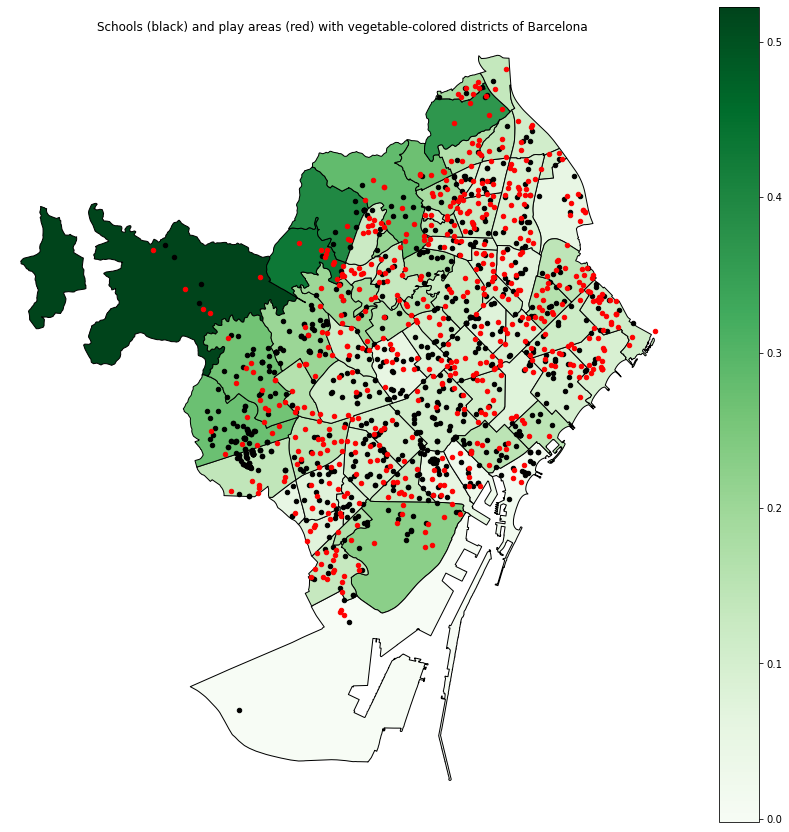

In [39]:
ax = overlayed_bcn.plot(figsize = (15,15), facecolor = 'white', edgecolor='k', legend=True, column= 'mean', cmap='Greens')
gdf_schools.plot(ax=ax, markersize = 20.0, color = 'black', legend=True)
gdf_playareas.plot(ax=ax, markersize = 20.0, color = 'red', legend=True)
ax.set(title="Schools (black) and play areas (red) with vegetable-colored districts of Barcelona")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(420500, 436000)
ax.set_ylim(4574000, 4591500)
ax.set_axis_off()

# JOINED DATA: checking information contained

We join the data preserving the geometry of the schools (points), and not the polygons from the districts. Hence, we now have the information regarding the administrative units of the city of each school.

In [40]:
schools_and_overlayedbcn = geopandas.sjoin(gdf_schools, overlayed_bcn, how='left',predicate='within')
playareas_and_overlayedbcn = geopandas.sjoin(gdf_playareas, overlayed_bcn, how='left',predicate='within')

playareas_and_overlayedbcn.head()

,register_id,prefix,suffix,name,created,modified,status,status_name,core_type,core_type_name,body,tickets_data,addresses,entity_types_data,attribute_categories,values,from_relationships,to_relationships,classifications_data,secondary_filters_data,timetable,image_data,gallery_data,warnings,geo_epgs_25831,geo_epgs_23031,geo_epgs_4326,is_section_of_data,sections_data,start_date,end_date,estimated_dates,languages_data,type,type_name,period,period_name,event_status_name,event_status,ical,coor_list,geometry,index_right,FID,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,NIVELL,NDESCR_CA,NDESCR_ES,NDESCR_EN,TERME,DISTRICTE,BARRI,AEB,SEC_CENS,GRANBARRI,ZUA,AREA_I,LITERAL,PERIMETRE,AREA,CODI_UA,TIPUS_UA,NOM,WEB1,WEB2,WEB3,FHEX_COLOR,Shape_Leng,Shape_Area,min,max,mean,count,sum,std,median,majority,minority,unique,range,nodata
0,92086011991,NaN,NaN,Àrea de Joc Infantil a València - Espronceda -...,1985-04-02T00:00:00+02:00,2021-05-04T12:32:53.856962+02:00,published,Publicat,place,Equipament,None,[],"[{'place': None, 'district_name': 'Sant Martí'...","[{'id': 102, 'name': 'equipament'}, {'id': 100...","[{'id': 1, 'name': 'Variables', 'attributes': ...","[{'id': 305734, 'value': 1, 'integer_value': 1...",[],[],"[{'id': 1011009, 'name': 'Espais amb jocs', 'f...","[{'id': 62073758, 'name': 'A l'aire lliure', '...",None,None,[],[],"{'x': 432421.69923842786, 'y': 4585018.029642559}","{'x': 432516.2263562934, 'y': 4585222.620924026}","{'x': 41.413873273948724, 'y': 2.191391846654727}",None,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BEGIN:VCALENDAR\r\nPRODID:ics.py - http://git....,"[432421.69923842786, 4585018.029642559]",POINT (432421.699 4585018.030),64.0,75.0,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,Límit de barri,ADM_03_PL,Límit de barri (polígon),Límite de barrrio (polígono),Neighborhood boundary (polygon),080193,Sant Martí,65,-,-,36,-,-,65,3953.568,6.967921e+05,65,BARRI,el Clot,http://lameva.barcelona.cat/santmarti/ca/home/...,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/document...,#E66900,3953.567534,6.967921e+05,-0.46,0.68,0.093813,860281.0,80705.945312,0.172143,0.03,-0.02,-0.37,108.0,1.14,0.0
1,92086011992,NaN,NaN,Àrea de Joc Infantil a l'Avinguda Sarrià - Agu...,1985-04-02T00:00:00+02:00,2021-05-04T12:33:01.635269+02:00,published,Publicat,place,Equipament,None,[],"[{'place': None, 'district_name': 'Les Corts',...","[{'id': 102, 'name': 'equipament'}, {'id': 100...","[{'id': 1, 'name': 'Variables', 'attributes': ...","[{'id': 305735, 'value': 1, 'integer_value': 1...",[],[],"[{'id': 1011009, 'name': 'Espais amb jocs', 'f...","[{'id': 62073758, 'name': 'A l'aire lliure', '...",None,None,[],[],"{'x': 427707.37454214145, 'y': 4582599.812252195}","{'x': 427801.92038426443, 'y': 4582804.365543397}","{'x': 41.391683165486405, 'y': 2.135277360075346}",None,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BEGIN:VCALENDAR\r\nPRODID:ics.py - http://git....,"[427707.37454214145, 4582599.812252195]",POINT (427707.375 4582599.812),18.0,29.0,01,Grup - I,0104,Unitats Administratives,010413,Barris,01041301,Barri,0104130101,Límit de barri,ADM_03_PL,Límit de barri (polígon),Límite de barrrio (polígono),Neighborhood boundary (polygon),080193,Les Corts,19,-,-,15,-,-,19,4966.151,1.410410e+06,19,BARRI,les Corts,http://lameva.barcelona.cat/lescorts/ca/home/e...,http://www.bcn.cat/estadistica/catala/dades/in...,http://www.bcn.cat/estadistica/catala/document...,#E66900,4966.150895,1.410410e+06,-0.53,0.83,0.145817,1741261.0,253904.890625,0.216177,0.06,0.03,-0.53,136.0,1.36,0.0
2,92086011993,NaN,NaN,Àrea de Joc Infantil a la Plaça de Can Rosés,1985-04-02T00:00:00+02:00,2021-05-04T12:32:54.435396+02:00,published,Publicat,place,Equipament,None,[],"[{'place': None, 'district_name': 'Les Corts',...","[{'id': 102, 'name': 'equipament'}, {'id': 100...","[{'id': 1, 'name': 'Variables', 'attributes': ...","[{'id': 305736, 'value': 1, 'in

We create a new GeoDataFrame where now the geometry of each row is a buffer with a radius of 300 meters. Once created, we convert it again to the original coordinates system, so that we can plot it without any problems.

In [41]:
buffer_gdf_schools = schools_and_overlayedbcn.to_crs('EPSG:32634')
buffer_gdf_schools.geometry = buffer_gdf_schools.geometry.buffer(300, 2)
buffer_gdf_schools = buffer_gdf_schools.to_crs('EPSG:25831')
buffer_gdf_schools.drop(['index_right'], axis = 1, inplace=True)

Besides, we can compute the amount of schools and play areas that are contained in each sub-division of the city. Therefore, together with the mean vegetation index of each of these divisions, we can create a final DataFrame with the name of the sub-division, the mean vegetation index and the ratio between the amount of play areas and the number of schools of each sub-division.

In [42]:
schools_barrio = schools_and_overlayedbcn.groupby('NOM').count()['name']
playareas_barrio = playareas_and_overlayedbcn.groupby('NOM').count()['name']
vegetation_barrio = overlayed_bcn.groupby('NOM')['mean']
q = playareas_barrio/schools_barrio
final_results = overlayed_bcn[['NOM','mean']]
final_results.columns = ['sub_division','mean_veg_cover']
final_results['play_areas/school'] = final_results['sub_division'].replace(to_replace=q.index, value=q.values)
final_results.sample(10)

<ipython-input-42-6cd2720576a3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_results['play_areas/school'] = final_results['sub_division'].replace(to_replace=q.index, value=q.values)


,sub_division,mean_veg_cover,play_areas/school
37,la Teixonera,0.100228,NaN
26,el Putxet i el Farró,0.108714,1.142857
27,Vallcarca i els Penitents,0.200561,1.000000
54,Ciutat Meridiana,0.185702,1.750000
57,Baró de Viver,0.110299,2.000000
55,Vallbona,0.134650,2.000000
51,la Prosperitat,0.085786,0.777778
45,el Turó de la Peira,0.151031,1.500000
5,la Sagrada Família,0.103007,1.272727
24,Sant Gervasi - la Bonanova,0.204388,0.270270


Now, we can create two sorted DataFrames, each one corresponding to the measure used to sort the results. We will store just the top-20 sub-divisions for each measure and, finally, join both DataFrames with the intersection of them, and see which sub-divisions of the city are in both top-20 rankings. 

In [43]:
top_veg = final_results.sort_values(by='mean_veg_cover', ascending=False)
top_ratio = final_results.sort_values(by='play_areas/school', ascending=False)

In [44]:
a = top_veg[top_veg['play_areas/school']>2]
a

,sub_division,mean_veg_cover,play_areas/school
38,Sant Genís dels Agudells,0.430919,4.500000
53,Torre Baró,0.368097,2.500000
48,Canyelles,0.268988,5.000000
28,el Coll,0.183395,3.000000
49,les Roquetes,0.163019,4.000000
33,Can Baró,0.156573,6.000000
72,la Verneda i la Pau,0.145261,2.833333
69,el Besòs i el Maresme,0.108816,2.333333
61,el Congrés i els Indians,0.094414,2.200000
68,Diagonal Mar i el Front Marítim del Poblenou,0.092713,4.000000


In [45]:
b = top_ratio[top_ratio['mean_veg_cover']>0.25]
b

,sub_division,mean_veg_cover,play_areas/school
48,Canyelles,0.268988,5.000000
38,Sant Genís dels Agudells,0.430919,4.500000
53,Torre Baró,0.368097,2.500000
42,Horta,0.284228,1.571429
21,"Vallvidrera, el Tibidabo i les Planes",0.522397,1.250000
22,Sarrià,0.262925,0.600000
39,Montbau,0.395462,0.285714
20,Pedralbes,0.271265,0.142857


Here, we can see the sub-divisions that have both a high mean vegetable index and a play areas per school ratio are:

In [46]:
c = pd.merge(a,b,how='inner')
c

,sub_division,mean_veg_cover,play_areas/school
0,Sant Genís dels Agudells,0.430919,4.5
1,Torre Baró,0.368097,2.5
2,Canyelles,0.268988,5.0


# The real estate market in Barcelona

In [47]:
def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

In [48]:
# Load the data
house_market = pd.read_csv('/Users/yersivillegas/Desktop/TERM 2/SD/HW2/Villegas_HW2/house_market_bcn.csv', delimiter=";")
house_market.drop(columns=['Unnamed: 0', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
cols = list(house_market.columns)

# Convert to numerical values
house_market = house_market.replace(to_replace="n.d.", value=np.nan)
for i in cols[1:]:
  house_market[i] = pd.to_numeric(house_market[i], downcast="float")

# Compute average price (euro/m2) of houses
house_market['euro_per_m2'] = np.nanmean(house_market.iloc[:, 1:], axis=1)
house_market.head()
# Check that neighborhood names are in the same order between dataframes
# so that we can eventually have the same string
house_market['check'] = [True if similar(house_market['Unnamed: 1'][i],final_results['sub_division'][i])>0.6 else False for i in range(house_market.shape[0])]
house_market['check'].value_counts()

<ipython-input-48-b60c65d9beab>:12: RuntimeWarning: Mean of empty slice
  house_market['euro_per_m2'] = np.nanmean(house_market.iloc[:, 1:], axis=1)


True     72
False     1
Name: check, dtype: int64

In [49]:
# Check which one is not similar
house_market[house_market['check']==False]['Unnamed: 1']

10    11. el Poble Sec-AEI Parc Montjuïc
Name: Unnamed: 1, dtype: object

In [50]:
# Check that it is actually the correct one
final_results['sub_division'][10]

'el Poble-sec'

In [51]:
# Change the names so that they match, since we know they are the same
house_market['Unnamed: 1'] = final_results['sub_division']
house_market = house_market[['Unnamed: 1','euro_per_m2']]
house_market.columns = ['sub_division', 'euro_per_m2']
house_market.head()

,sub_division,euro_per_m2
0,el Raval,3.410444
1,el Barri Gòtic,4.341555
2,la Barceloneta,4.596667
3,"Sant Pere, Santa Caterina i la Ribera",4.419111
4,el Fort Pienc,3.852889


In [52]:
# Join the data
final_results['veg_play_score'] = final_results['mean_veg_cover']*final_results['play_areas/school']
total_data = final_results.join(house_market['euro_per_m2'])
total_data.head()

<ipython-input-52-e2902f82ee9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_results['veg_play_score'] = final_results['mean_veg_cover']*final_results['play_areas/school']


,sub_division,mean_veg_cover,play_areas/school,veg_play_score,euro_per_m2
0,el Raval,0.058144,0.346154,0.020127,3.410444
1,el Barri Gòtic,0.027492,0.600000,0.016495,4.341555
2,la Barceloneta,0.015149,0.250000,0.003787,4.596667
3,"Sant Pere, Santa Caterina i la Ribera",0.148819,0.421053,0.062660,4.419111
4,el Fort Pienc,0.107469,1.500000,0.161204,3.852889


In [53]:
total_data.corr()

,mean_veg_cover,play_areas/school,veg_play_score,euro_per_m2
mean_veg_cover,1.000000,0.254882,0.624523,0.012207
play_areas/school,0.254882,1.000000,0.816368,-0.330861
veg_play_score,0.624523,0.816368,1.000000,-0.269402
euro_per_m2,0.012207,-0.330861,-0.269402,1.000000


In [54]:
total_data['veg_play_score']=(total_data['veg_play_score']-total_data['veg_play_score'].min())/(total_data['veg_play_score'].max()-total_data['veg_play_score'].min())  
total_data['price_normalized']=(total_data['euro_per_m2']-total_data['euro_per_m2'].min())/(total_data['euro_per_m2'].max()-total_data['euro_per_m2'].min())  

total_data.head()

,sub_division,mean_veg_cover,play_areas/school,veg_play_score,euro_per_m2,price_normalized
0,el Raval,0.058144,0.346154,0.011527,3.410444,0.410285
1,el Barri Gòtic,0.027492,0.600000,0.009656,4.341555,0.609246
2,la Barceloneta,0.015149,0.250000,0.003111,4.596667,0.663759
3,"Sant Pere, Santa Caterina i la Ribera",0.148819,0.421053,0.033436,4.419111,0.625819
4,el Fort Pienc,0.107469,1.500000,0.084195,3.852889,0.504827


In [58]:
total_data.sort_values(by='price_normalized', ascending=False)

,sub_division,mean_veg_cover,play_areas/school,veg_play_score,euro_per_m2,price_normalized
68,Diagonal Mar i el Front Marítim del Poblenou,0.092713,4.000000,0.192184,6.170222,1.000000
20,Pedralbes,0.271265,0.142857,0.021121,5.833666,0.928084
23,les Tres Torres,0.161047,1.250000,0.104853,5.431223,0.842089
6,la Dreta de l'Eixample,0.105092,0.297297,0.017253,5.418777,0.839430
22,Sarrià,0.262925,0.600000,0.082419,5.372778,0.829600
66,la Vila Olímpica del Poblenou,0.145860,0.266667,0.021195,5.140625,0.779994
25,Sant Gervasi - Galvany,0.108402,0.368421,0.021732,4.939444,0.737005
24,Sant Gervasi - la Bonanova,0.204388,0.270270,0.029614,4.802778,0.707802
7,l'Antiga Esquerra de l'Eixample,0.100435,0.310345,0.017215,4.623445,0.669481
2,la Barceloneta,0.015149,0.250000,0.003111,4.596667,0.663759


# BUFFER:

Finally, we plot the buffers (blue buffers) around the schools of Barcelona (black markers) and the children's play areas (red markers) within the previously explained administrative units of the city, which are now represented with the color corresponding to the ***mean*** index of vegetable cover they have, computed by the zonal statistics. Hence, we can see the schools containing play areas in a radius of 300m.

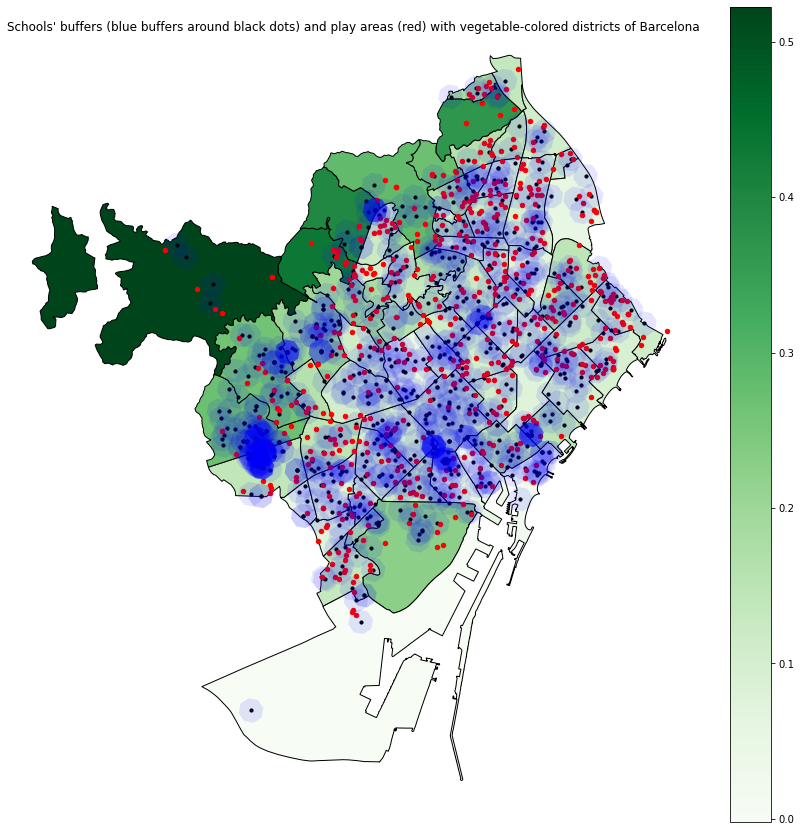

In [56]:
ax = overlayed_bcn.plot(figsize = (15,15), facecolor = 'white', edgecolor='k', legend=True, column= 'mean', cmap='Greens')
gdf_schools.plot(ax=ax, markersize = 10.0, color = 'black', legend=True)
gdf_playareas.plot(ax=ax, markersize = 20.0, color = 'red', legend=True)
buffer_gdf_schools.plot(ax=ax,alpha=0.1,color='blue')
ax.set(title="Schools' buffers (blue buffers around black dots) and play areas (red) with vegetable-colored districts of Barcelona")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xlim(420500, 436000)
ax.set_ylim(4574000, 4591500)
ax.set_axis_off()